<a href="https://colab.research.google.com/github/BakhtiyDeveloper/Covid_19_X-ray_model_new/blob/main/Covid_Proyekt_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
!pip install fastai==2.5.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for gputil: filename=GPUtil-1.4.0-py3-none-any.whl size=7409 sha256=b3e643c48b85e1f698f6cb8629b04e039c7706cb7076e1f62625bda4c6018373
  Stored in directory: /root/.cache/pip/wheels/ba/03/bb/7a97840eb54479b328672e15a536e49dc60da200fb21564d53
Successfully built gputil
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.5/189.5 KB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.9/881.9 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.0/56.0 KB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [1]:
!pip list | grep -e torch -e torchvision -e matplotlib -e tensorflow -e keras

keras                         2.11.0
keras-vis                     0.4.1
matplotlib                    3.2.2
matplotlib-venn               0.11.7
tensorflow                    2.11.0
tensorflow-datasets           4.8.2
tensorflow-estimator          2.11.0
tensorflow-gcs-config         2.11.0
tensorflow-hub                0.12.0
tensorflow-io-gcs-filesystem  0.30.0
tensorflow-metadata           1.12.0
tensorflow-probability        0.19.0
torch                         1.10.2
torchaudio                    0.13.1+cu116
torchsummary                  1.5.1
torchtext                     0.14.1
torchvision                   0.11.3


In [9]:
import psutil
import humanize
import os
import GPUtil as GPU
import numpy as np
import torch
import fastai
from fastai import *
from fastai.vision.all import *
from ipywidgets import widgets 
from fastai.metrics import accuracy, error_rate


In [10]:
print(torch.__version__)
print(fastai.__version__)

1.10.2+cu102
2.5.3


In [5]:
!unzip /content/drive/MyDrive/chest_xray.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0448-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0449-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0450-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0451-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0452-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0453-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0453-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0455-0001.jpeg  
  inflatin

In [16]:
path = Path("/content/chest_xray/train")
path.ls()

(#3) [Path('/content/chest_xray/train/.DS_Store'),Path('/content/chest_xray/train/NORMAL'),Path('/content/chest_xray/train/PNEUMONIA')]

In [17]:
get_img = get_image_files(path)
get_img

(#5216) [Path('/content/chest_xray/train/NORMAL/NORMAL2-IM-0555-0001-0001.jpeg'),Path('/content/chest_xray/train/NORMAL/IM-0523-0001-0001.jpeg'),Path('/content/chest_xray/train/NORMAL/IM-0475-0001.jpeg'),Path('/content/chest_xray/train/NORMAL/IM-0591-0001.jpeg'),Path('/content/chest_xray/train/NORMAL/NORMAL2-IM-0609-0001.jpeg'),Path('/content/chest_xray/train/NORMAL/IM-0248-0001.jpeg'),Path('/content/chest_xray/train/NORMAL/IM-0303-0001.jpeg'),Path('/content/chest_xray/train/NORMAL/NORMAL2-IM-0804-0001.jpeg'),Path('/content/chest_xray/train/NORMAL/IM-0523-0001-0002.jpeg'),Path('/content/chest_xray/train/NORMAL/NORMAL2-IM-0877-0001.jpeg')...]

In [18]:
fail_img = verify_images(path)
fail_img

'PosixPath' object is not iterable


(#0) []

Blok yaratamiz

In [19]:
Covid_or_Pneumoniya_class = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y = parent_label,
    item_tfms = Resize(224)  
)

Dataloaders

In [20]:
dls = Covid_or_Pneumoniya_class.dataloaders(path)

datasetni tekshiramiz

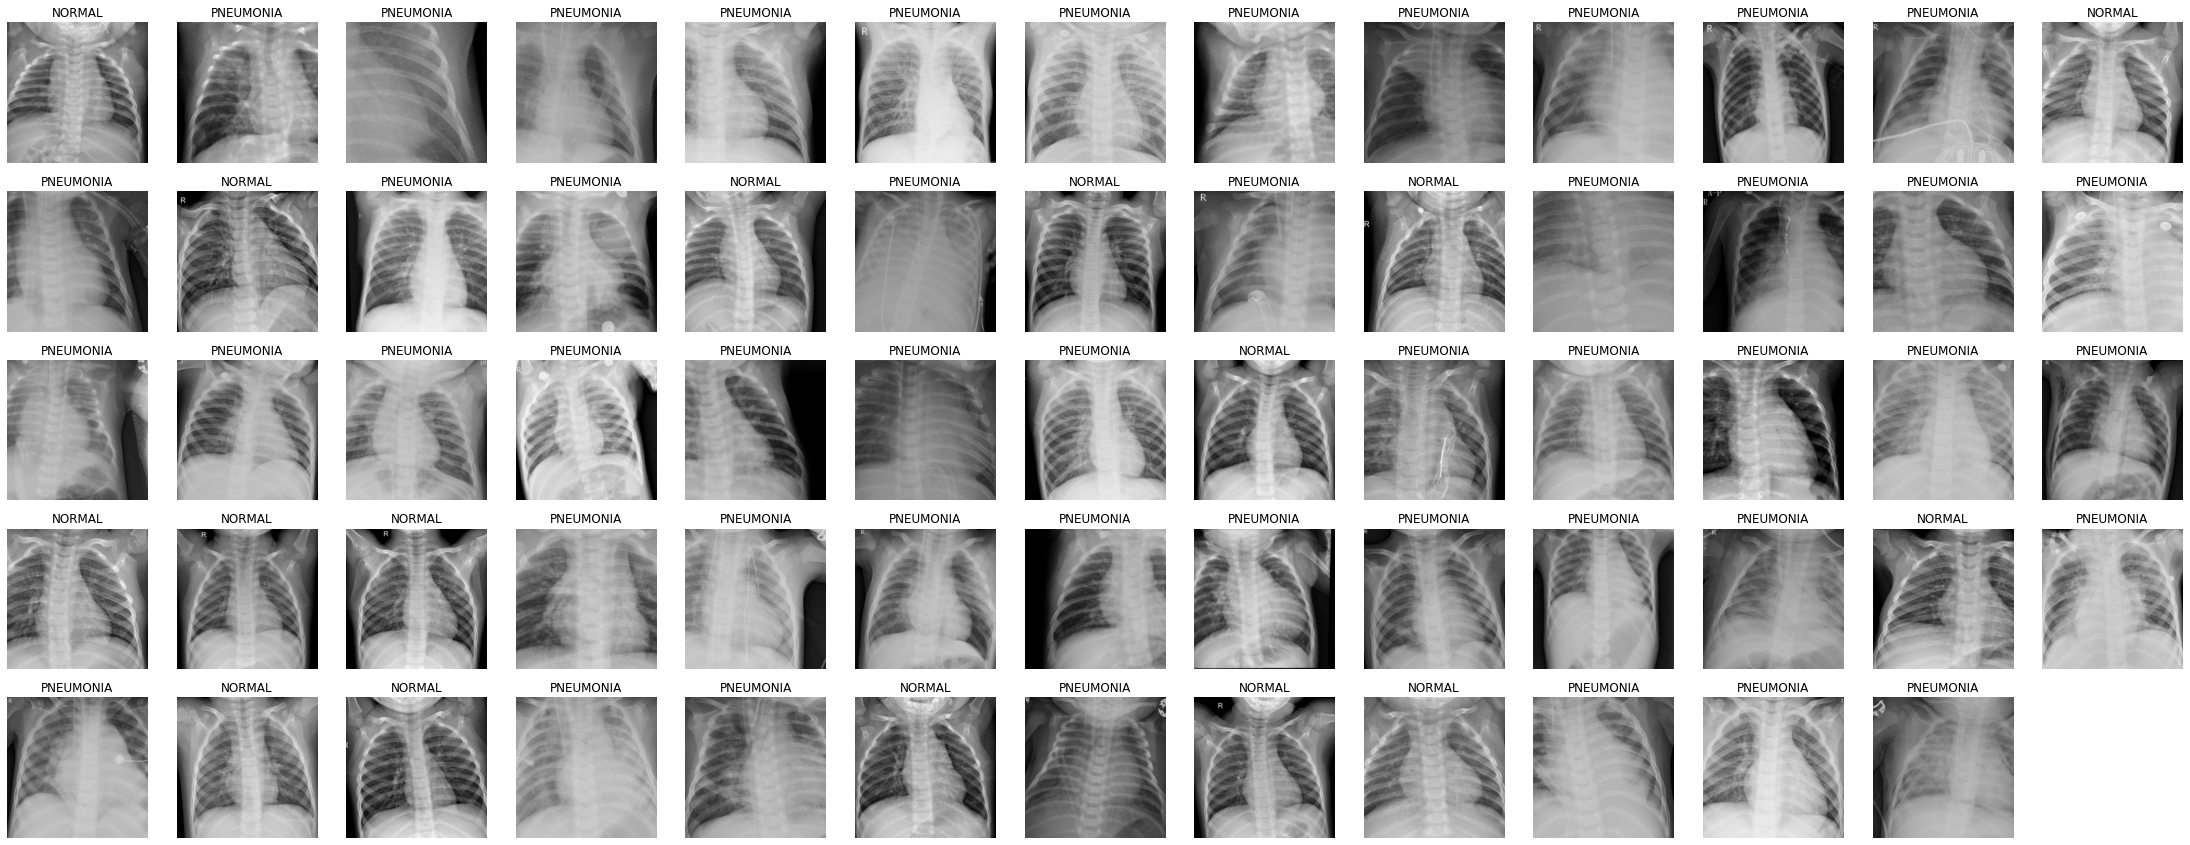

In [23]:
dls.train.show_batch(max_n=80, nrows=5)

In [25]:
learn = cnn_learner(dls, resnet50, metrics=[error_rate, accuracy])
learn.fine_tune(8)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [26]:
learn.save("Covid_or_Pneumonia_res50_01")

Path('models/Covid_or_Pneumonia_res50_01.pth')

In [27]:
learn.load("Covid_or_Pneumonia_res50_01")

In [28]:
learn.summary()

Sequential (Input shape: 64 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 112 x 112 
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 56 x 56   
MaxPool2d                                                      
Conv2d                                    4096       True      
BatchNorm2d                               128        True      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
____________________________________________________________________________
                     64 x 256 x 56 x 56  
Conv2d                                    16384      True      
BatchNorm2d                        

In [29]:
learn.unfreeze()

In [30]:
learn.summary()

Sequential (Input shape: 64 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 112 x 112 
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 56 x 56   
MaxPool2d                                                      
Conv2d                                    4096       True      
BatchNorm2d                               128        True      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
____________________________________________________________________________
                     64 x 256 x 56 x 56  
Conv2d                                    16384      True      
BatchNorm2d                        

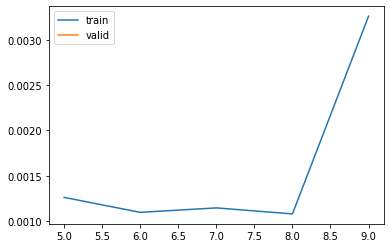

In [34]:
learn.recorder.plot_loss()

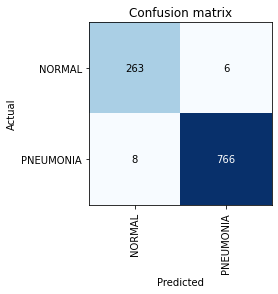

In [44]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

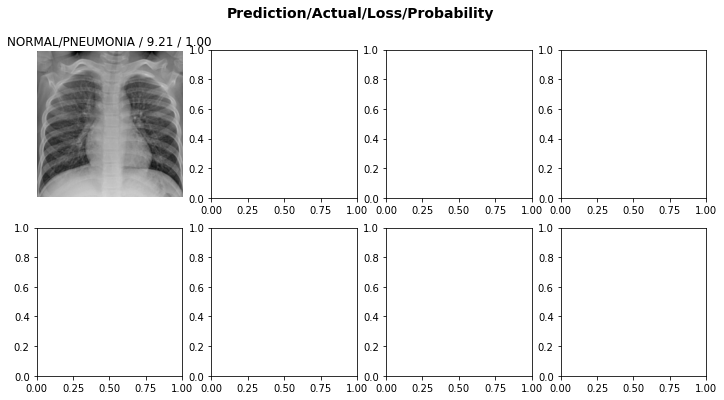

In [45]:
interp.plot_top_losses(8, nrows=2)

In [56]:
doc(learn.recorder.plot_loss)

Recorder.plot_loss(skip_start=5, with_valid=True)
Plot the losses from `skip_start` and onward

To get a prettier result with hyperlinks to source code and documentation, install nbdev: pip install nbdev


In [58]:
doc(learn.fit_one_cycle)

Learner.fit_one_cycle(n_epoch, lr_max=None, div=25.0, div_final=100000.0, pct_start=0.25, wd=None, moms=None, cbs=None, reset_opt=False)
Fit `self.model` for `n_epoch` using the 1cycle policy.

To get a prettier result with hyperlinks to source code and documentation, install nbdev: pip install nbdev


In [59]:
learn.save("Covid_or_Pneumonia_res50_final")

Path('models/Covid_or_Pneumonia_res50_final.pth')

In [60]:
learn.load("Covid_or_Pneumonia_res50_final")

In [61]:
learn.summary()

Sequential (Input shape: 64 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 112 x 112 
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 56 x 56   
MaxPool2d                                                      
Conv2d                                    4096       True      
BatchNorm2d                               128        True      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
____________________________________________________________________________
                     64 x 256 x 56 x 56  
Conv2d                                    16384      True      
BatchNorm2d                        

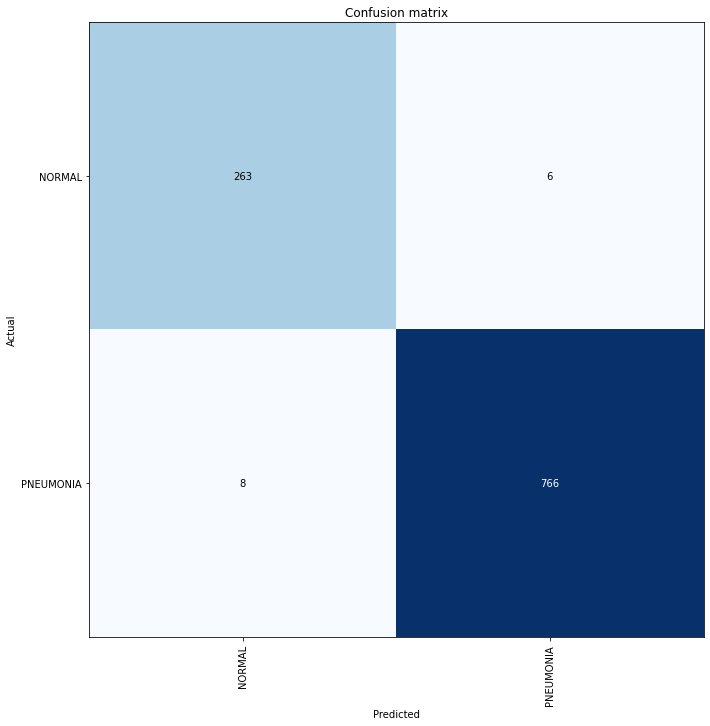

In [65]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(15, 10))

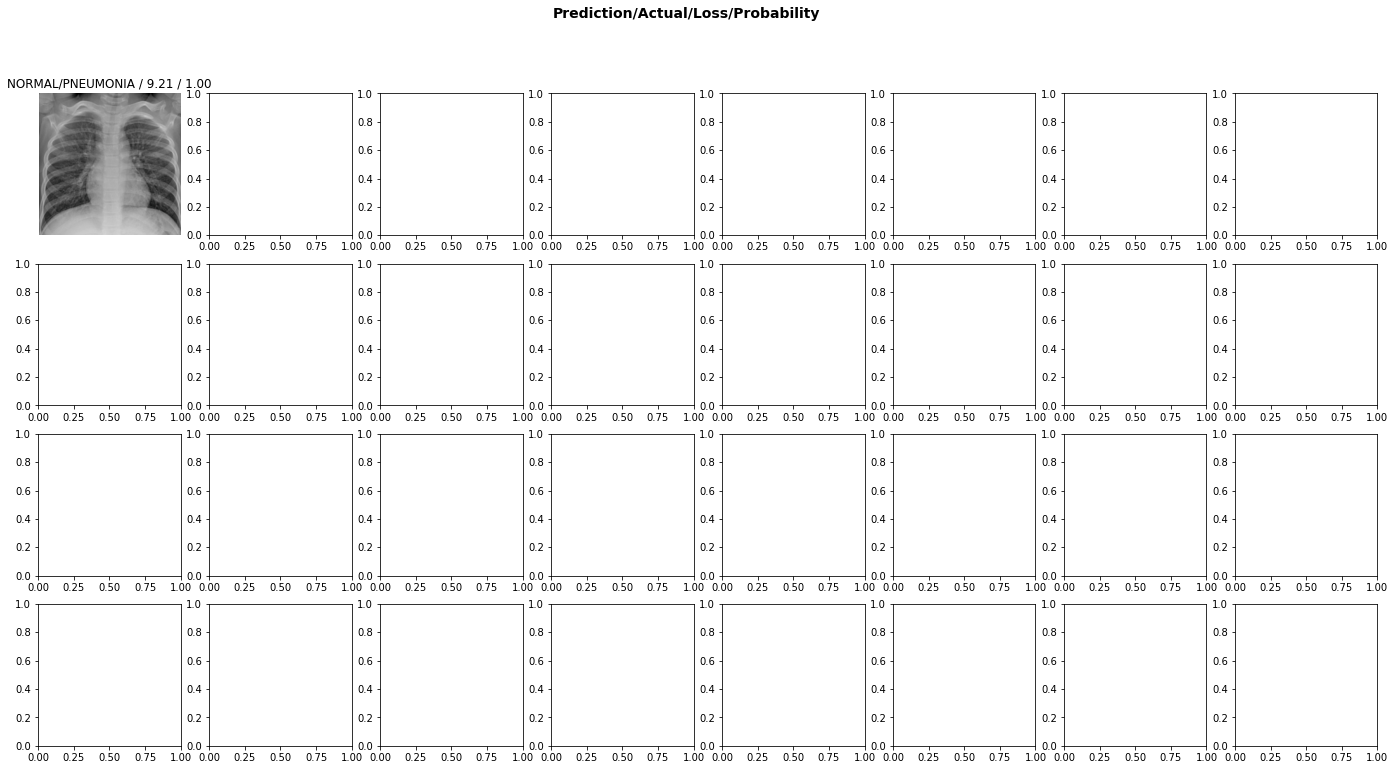

In [70]:
interp.plot_top_losses(32, nrows=4)

In [71]:
interp.most_confused(min_val=1)

[('PNEUMONIA', 'NORMAL', 8), ('NORMAL', 'PNEUMONIA', 6)]

modelni tekshiramiz


In [72]:
upload = widgets.FileUpload()
upload 

FileUpload(value={}, description='Upload')

Bashorat: NORMAL 
Ehtomolligi: 68.4%


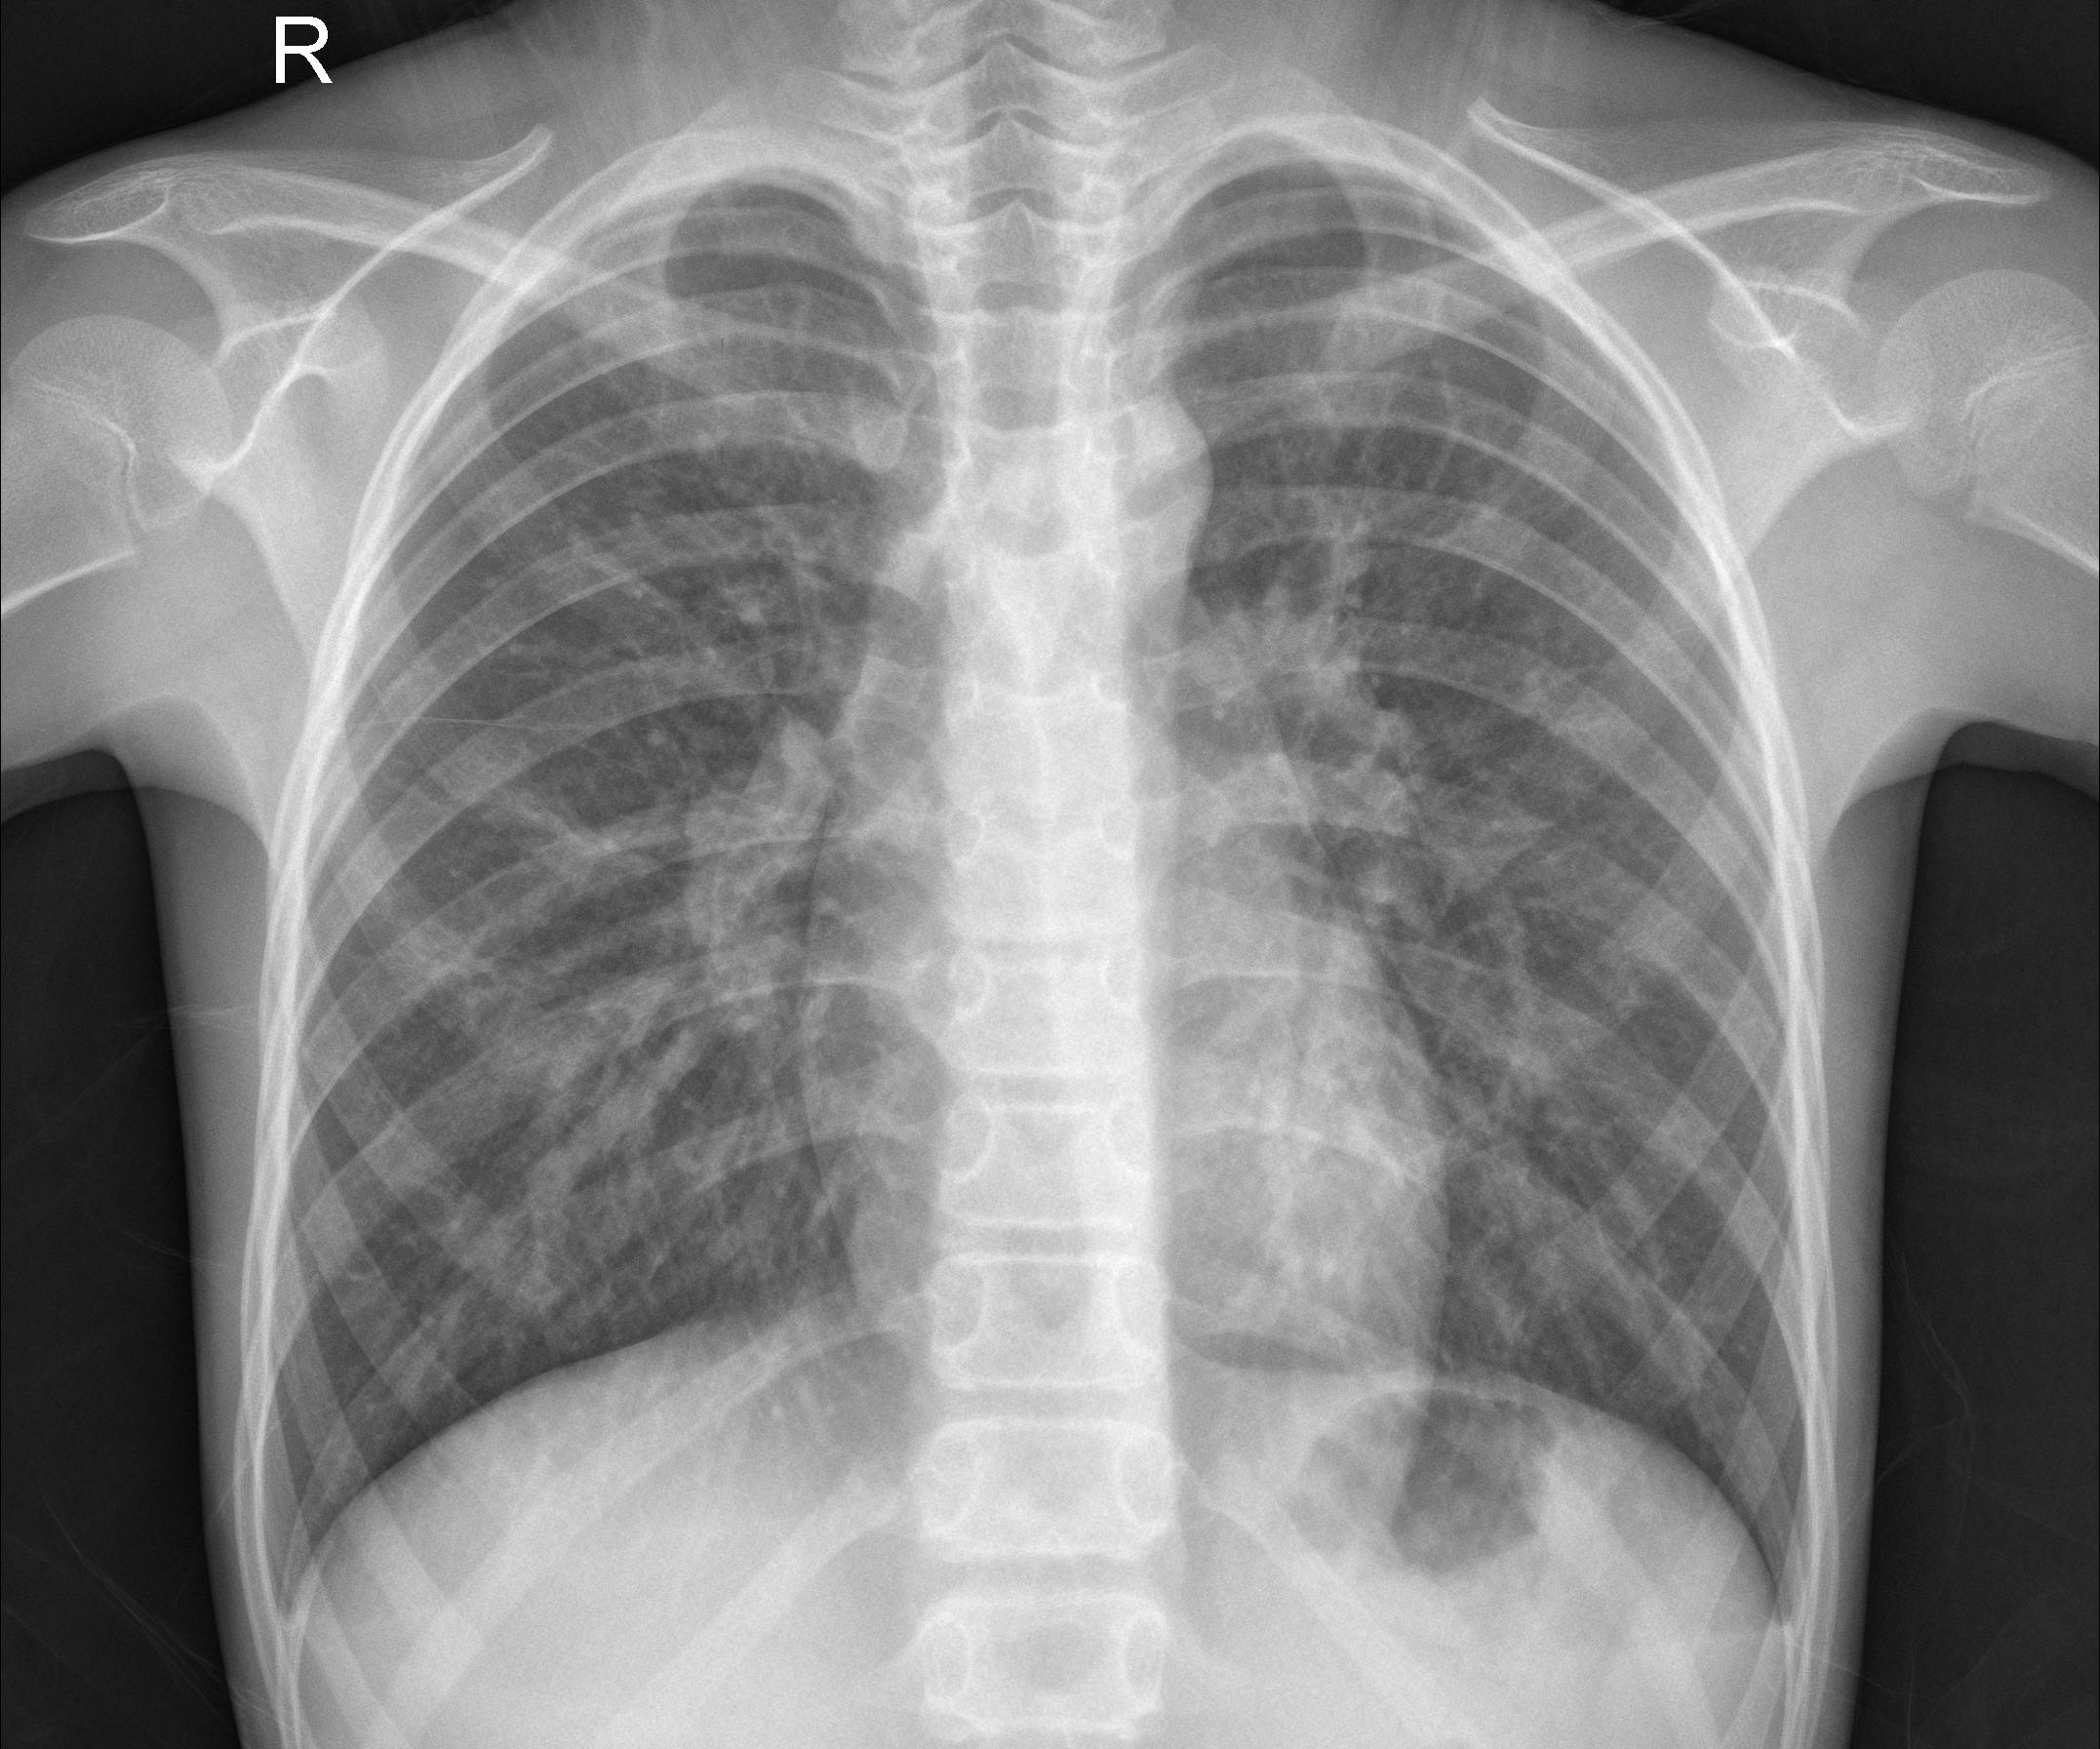

In [76]:
img = PILImage.create(upload.data[-1])
pred, pred_id, probs = learn.predict(img)
print(f"Bashorat: {pred} ")
print(f"Ehtomolligi: {probs[pred_id]*100:.1f}%")
img

In [77]:
learn.export("Covid_19_model_new.pkl")

In [78]:
model = load_learner("/content/Covid_19_model_new.pkl")

In [79]:
model.predict(img)

('NORMAL', TensorBase(0), TensorBase([0.6844, 0.3156]))